In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

In [85]:
driver = webdriver.Chrome('C:/Users/abinash/chromedriver.exe')
driver.get('https://www.premierleague.com/tables?co=1&se=274&ha=-1')

C:\Users\abinash\AppData\Local\Temp/ipykernel_7944/406850571.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/Users/abinash/chromedriver.exe')


In [86]:
link= driver.find_element_by_xpath('/html/body/div[1]/div/div/div[1]/div[5]/button[1]').click()

C:\Users\abinash\AppData\Local\Temp/ipykernel_7944/2729910894.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  link= driver.find_element_by_xpath('/html/body/div[1]/div/div/div[1]/div[5]/button[1]').click()


In [87]:
driver.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/div[1]/section/div[2]/div[2]').click()

C:\Users\abinash\AppData\Local\Temp/ipykernel_7944/3111274129.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/div[1]/section/div[2]/div[2]').click()


In [88]:
driver.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/div[1]/section/div[2]/ul/li[4]').click()

C:\Users\abinash\AppData\Local\Temp/ipykernel_7944/745336706.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/div[1]/section/div[2]/ul/li[4]').click()


In [92]:
round= 1
for i in range (2,40):
    driver.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/div[1]/section/div[3]/div[2]').click()
    time.sleep(1)
    driver.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/div[1]/section/div[3]/ul/li['+str(i)+']').click()
    time.sleep(10)
    table= driver.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/div[5]/div/div/div/table')
    headers = []
    for i in table.find_elements_by_tag_name('th')[2:11:]:
        title = i.text.strip()
        headers.append(title)
    df = pd.DataFrame(columns = headers)    
    for row in table.find_elements_by_xpath("//*[starts-with(@data-compseason, '274')]"):
        data = row.find_elements_by_tag_name('td')
        row_data = [td.text.strip() for td in data[2:11:]]
        length = len(df)
        df.loc[length] = row_data
    df.to_csv(f'PL_table_matchweek_{round}.csv', index=False)
    round = round + 1 
    #sleep(np.random.randint(1, 10))

C:\Users\abinash\AppData\Local\Temp/ipykernel_7944/3752597755.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/div[1]/section/div[3]/div[2]').click()
C:\Users\abinash\AppData\Local\Temp/ipykernel_7944/3752597755.py:5: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/div[1]/section/div[3]/ul/li['+str(i)+']').click()
C:\Users\abinash\AppData\Local\Temp/ipykernel_7944/3752597755.py:7: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  table= driver.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/div[5]/div/div/div/table')


In [1]:
import pandas as pd
import seaborn as sns
sns.set(color_codes= True)
import numpy as np
from matplotlib import pyplot as plt

In [46]:
dataset = pd.read_csv(r"C:\Users\abinash\Downloads\Matchweeks-positions.csv")


In [47]:
dataset.head()

,weeks,Manchester_City,Manchester_United,Liverpool,Brighton,Burnley,Tottenham_Hotspur,Arsenal,Bournemouth,Sheffield_United,...,Everton,Leicester_City,Wolverhampton_Wanderers,Newcastle_United,Aston_Villa,Norwich_City,Southampton,Watford,Chelsea,West_Ham_United
0,matchweek 1,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
1,matchweek 2,3,4,1,5,10,6,2,7,8,...,9,12,13,18,17,11,19,20,15,16
2,matchweek 3,2,5,1,8,6,7,3,11,9,...,12,4,15,19,16,17,18,20,13,14
3,matchweek 4,2,8,1,16,12,9,5,15,10,...,6,3,17,14,18,19,13,20,11,7
4,matchweek 5,2,4,1,16,14,3,7,9,15,...,11,5,19,18,17,13,10,20,6,8


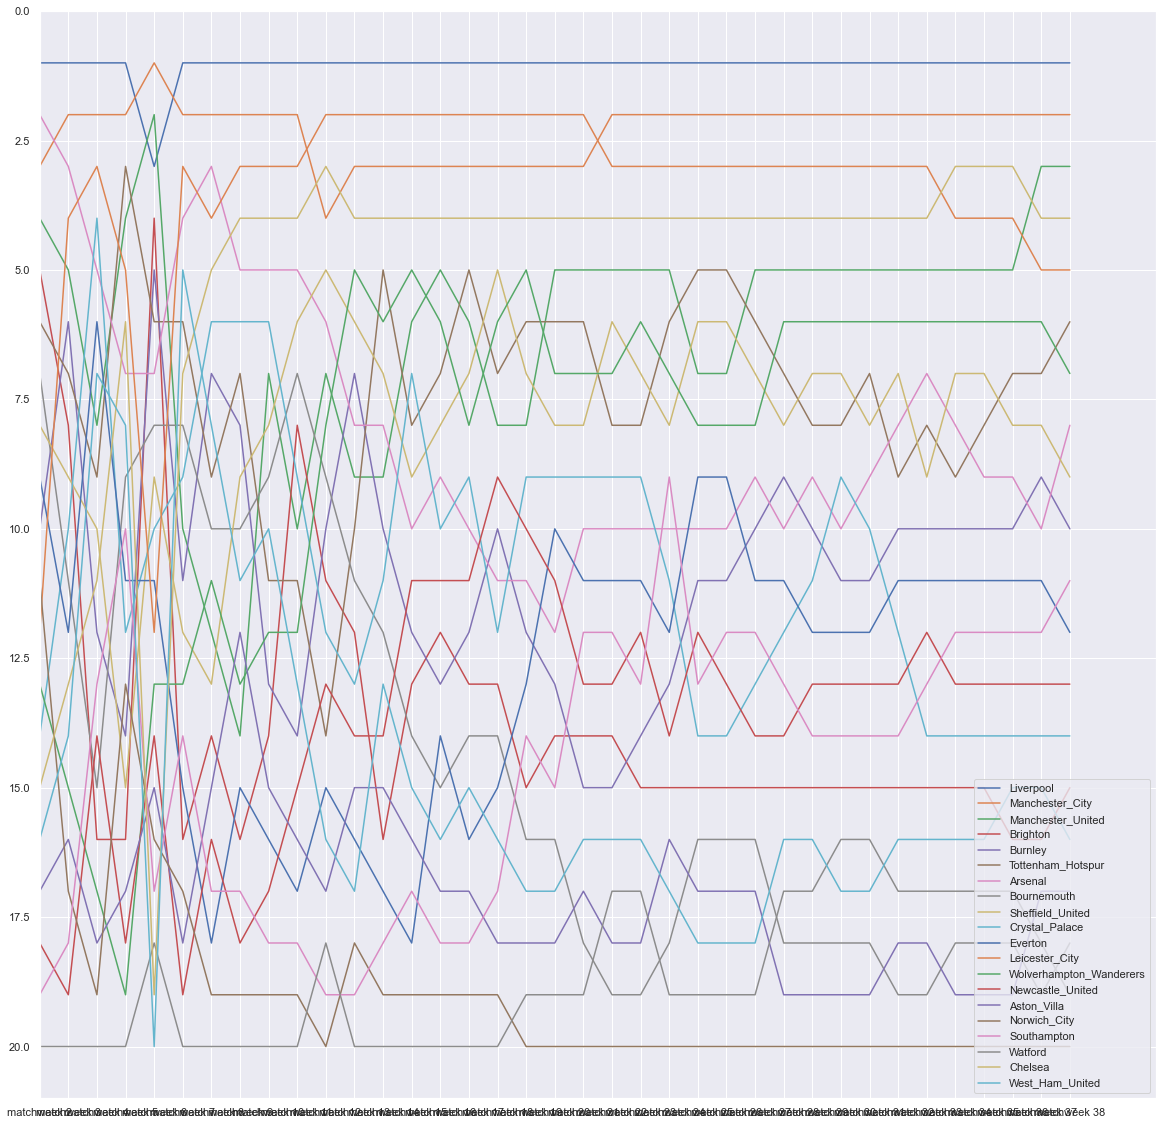

In [48]:
plt.figure(figsize=(20,20))
plt.plot(dataset.weeks, dataset.Liverpool, label = 'Liverpool')
plt.plot(dataset.weeks, dataset.Manchester_City, label = 'Manchester_City')
plt.plot(dataset.weeks, dataset.Manchester_United, label = 'Manchester_United')
plt.plot(dataset.weeks, dataset.Brighton, label = 'Brighton')
plt.plot(dataset.weeks, dataset.Burnley, label = 'Burnley')
plt.plot(dataset.weeks, dataset.Tottenham_Hotspur, label = 'Tottenham_Hotspur')
plt.plot(dataset.weeks, dataset.Arsenal, label = 'Arsenal')
plt.plot(dataset.weeks, dataset.Bournemouth, label = 'Bournemouth')
plt.plot(dataset.weeks, dataset.Sheffield_United, label = 'Sheffield_United')
plt.plot(dataset.weeks, dataset.Crystal_Palace, label = 'Crystal_Palace')
plt.plot(dataset.weeks, dataset.Everton, label = 'Everton')
plt.plot(dataset.weeks, dataset.Leicester_City, label = 'Leicester_City')
plt.plot(dataset.weeks, dataset.Wolverhampton_Wanderers, label = 'Wolverhampton_Wanderers')
plt.plot(dataset.weeks, dataset.Newcastle_United, label = 'Newcastle_United')
plt.plot(dataset.weeks, dataset.Aston_Villa, label = 'Aston_Villa')
plt.plot(dataset.weeks, dataset.Norwich_City, label = 'Norwich_City')
plt.plot(dataset.weeks, dataset.Southampton, label = 'Southampton')
plt.plot(dataset.weeks, dataset.Watford, label = 'Watford')
plt.plot(dataset.weeks, dataset.Chelsea, label = 'Chelsea')
plt.plot(dataset.weeks, dataset.West_Ham_United, label = 'West_Ham_United')
plt.xlim(1,40)
plt.ylim(21,0)
plt.legend(loc = "best")
plt.show()